# Library

In [ ]:
import numpy as np 
import pandas as pd 
import time

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Preprocessing
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Feature selection
from sklearn.feature_selection import SelectPercentile, SelectFromModel, RFE

# ML algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Evaluation
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score, make_scorer, roc_auc_score, classification_report, confusion_matrix, PrecisionRecallDisplay, ConfusionMatrixDisplay

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 4.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Rakamin x IDX Partners - VIX/loan_data_2007_2014.csv'
df = pd.read_csv(path, index_col=0)
df

<ipython-input-2-99064d510822>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, index_col=0)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [ ]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape[0]} baris dan {df.shape[1]} kolom')

df.info(verbose= True, show_counts=True)

Jumlah baris dan kolom di dataset df adalah 466285 baris dan 74 kolom
<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  o

In [ ]:
df.shape

(466285, 74)

In [ ]:
df=df.dropna(axis=1,how='all')

In [ ]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape[0]} baris dan {df.shape[1]} kolom')
df.info(verbose= True, show_counts=True)

Jumlah baris dan kolom di dataset df adalah 466285 baris dan 57 kolom
<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  o

In [ ]:
df.shape

(466285, 57)

<ipython-input-36-de01e6756bd2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr(method='spearman') # Spearman because based on histplot visualization none of the column show the normal distribution


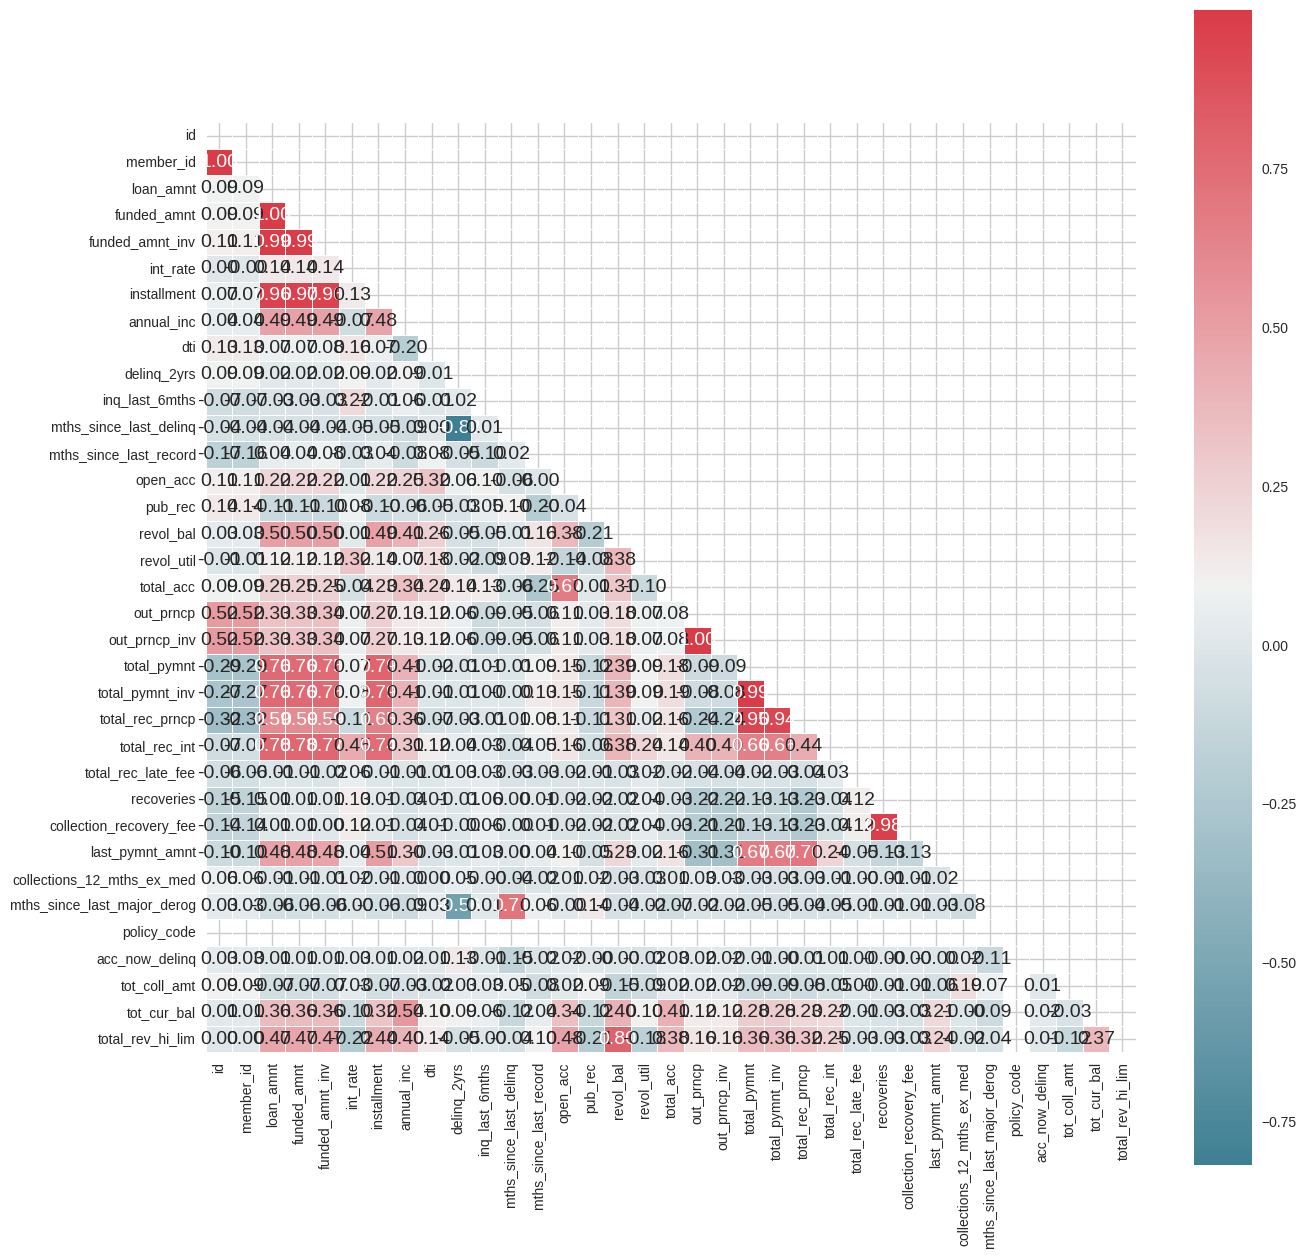

In [ ]:
correlation = df.corr(method='spearman') # Spearman because based on histplot visualization none of the column show the normal distribution

fig, ax = plt.subplots()
ax.figure.set_size_inches(15, 15)

mask = np.triu(np.ones_like(correlation))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correlation, cmap=cmap, square=True, mask=mask, linewidths=.5, annot_kws={'size':14},
            annot=True, fmt='.2f')
plt.show()

In [ ]:
pd.set_option('display.max_colwidth', 1)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique
0,id,466285
1,member_id,466285
2,loan_amnt,1352
3,funded_amnt,1354
4,funded_amnt_inv,9854
5,term,2
6,int_rate,506
7,installment,55622
8,grade,7
9,sub_grade,35


In [ ]:
# All id are unique
wo_id = df.drop(columns=['id', 'member_id'])

Based on Exploratory Data Analytics, the target is loan_status columns. Then there are two data types on loan_status columns, the historical data (Fully Paid and Charged Off) and on going data (beside Fully Paid and Charged Off). 

Why can i say it as historical data? 


Because when we look to value Fully Paid and Charged Off on loan_status columns, the data in next_payment_d is also null. So i can say it as a closed case and we can looking forward for this part for model development. The on going data will be excluded, because loan_status will most likely change over time. And we can use this on going data for model testing purpose at the future when the loan_status has been changed to Fully Paid or Charged Off (means Case Close)

In [ ]:
options = ['Fully Paid', 'Charged Off']
df_closed = wo_id[wo_id['loan_status'].isin (options)] 
print(f'Jumlah baris dan kolom di dataset wo_id adalah {df_closed.shape[0]} baris dan {df_closed.shape[1]} kolom')
df_closed.info(verbose= True, show_counts=True)

Jumlah baris dan kolom di dataset wo_id adalah 227214 baris dan 55 kolom
<class 'pandas.core.frame.DataFrame'>
Int64Index: 227214 entries, 0 to 466283
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    227214 non-null  int64  
 1   funded_amnt                  227214 non-null  int64  
 2   funded_amnt_inv              227214 non-null  float64
 3   term                         227214 non-null  object 
 4   int_rate                     227214 non-null  float64
 5   installment                  227214 non-null  float64
 6   grade                        227214 non-null  object 
 7   sub_grade                    227214 non-null  object 
 8   emp_title                    214511 non-null  object 
 9   emp_length                   218541 non-null  object 
 10  home_ownership               227214 non-null  object 
 11  annual_inc                   227214 non-null

In [ ]:
pd.set_option('display.max_colwidth', 1)
# data unik di tiap kolom
listItem = []
for col in df_closed.columns :
    listItem.append( [col, df_closed[col].nunique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique
0,loan_amnt,1303
1,funded_amnt,1306
2,funded_amnt_inv,8523
3,term,2
4,int_rate,483
5,installment,42313
6,grade,7
7,sub_grade,35
8,emp_title,124991
9,emp_length,11


Drop 
1. emp_title (text), 
1. pymnt_plan (dominan 1 value), 
1. url (text), 
1. desc(text), 
1. title (text), 
1. zip_code (mirip object/ terwakili addr_state), 
1. out_prncp (1 value), 
1. out_prncp_inv (1 value), 
1. next_pymnt_d (null), 
1. policy_code (1 value), 
1. application_type (1 value)
1. issue_d (date)
1. earliest_cr_line (date)
1. last_pymnt_d (date)
1. last_credit_pull_d (date)
1. addr_state (50 unique value)
1. sub_grade (35 unique value)

In [ ]:
df_closed_drop17 = df_closed.drop(columns=['emp_title', 'pymnt_plan', 'url', 'desc', 'title', 'zip_code', 'out_prncp', 'out_prncp_inv', 'next_pymnt_d', 'policy_code', 'application_type', 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'addr_state', 'sub_grade'])
df_closed_drop17.shape

(227214, 38)

In [ ]:
print(f'Jumlah baris dan kolom di dataset wo_id adalah {df_closed_drop17.shape[0]} baris dan {df_closed_drop17.shape[1]} kolom')
df_closed_drop17.info(verbose= True, show_counts=True)

Jumlah baris dan kolom di dataset wo_id adalah 227214 baris dan 38 kolom
<class 'pandas.core.frame.DataFrame'>
Int64Index: 227214 entries, 0 to 466283
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    227214 non-null  int64  
 1   funded_amnt                  227214 non-null  int64  
 2   funded_amnt_inv              227214 non-null  float64
 3   term                         227214 non-null  object 
 4   int_rate                     227214 non-null  float64
 5   installment                  227214 non-null  float64
 6   grade                        227214 non-null  object 
 7   emp_length                   218541 non-null  object 
 8   home_ownership               227214 non-null  object 
 9   annual_inc                   227214 non-null  float64
 10  verification_status          227214 non-null  object 
 11  loan_status                  227214 non-null

In [ ]:
df_closed_drop17[['loan_status']].value_counts()

loan_status
Fully Paid     184739
Charged Off    42475 
dtype: int64

In [ ]:
# Below code gives percentage of null in every column
null_percentage = df_closed_drop17.isnull().sum()/df_closed_drop17.shape[0]*100

# Below code gives list of columns having more than 20% null
col_to_drop = null_percentage[null_percentage>20].keys()

output_df = df_closed_drop17.drop(col_to_drop, axis=1)
output_df.info(verbose= True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227214 entries, 0 to 466283
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   227214 non-null  int64  
 1   funded_amnt                 227214 non-null  int64  
 2   funded_amnt_inv             227214 non-null  float64
 3   term                        227214 non-null  object 
 4   int_rate                    227214 non-null  float64
 5   installment                 227214 non-null  float64
 6   grade                       227214 non-null  object 
 7   emp_length                  218541 non-null  object 
 8   home_ownership              227214 non-null  object 
 9   annual_inc                  227214 non-null  float64
 10  verification_status         227214 non-null  object 
 11  loan_status                 227214 non-null  object 
 12  purpose                     227214 non-null  object 
 13  dti           

In [ ]:
output_df.isnull().sum()/output_df.shape[0]*100

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
emp_length                    3.817106
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
loan_status                   0.000000
purpose                       0.000000
dti                           0.000000
delinq_2yrs                   0.000000
inq_last_6mths                0.000000
open_acc                      0.000000
pub_rec                       0.000000
revol_bal                     0.000000
revol_util                    0.081861
total_acc                     0.000000
initial_list_status           0.000000
total_pymnt                   0.000000
total_pymnt_inv               0.000000
total_rec_prncp               0.000000
total_rec_int            

In [ ]:
output_df.isnull().sum()

loan_amnt                     0   
funded_amnt                   0   
funded_amnt_inv               0   
term                          0   
int_rate                      0   
installment                   0   
grade                         0   
emp_length                    8673
home_ownership                0   
annual_inc                    0   
verification_status           0   
loan_status                   0   
purpose                       0   
dti                           0   
delinq_2yrs                   0   
inq_last_6mths                0   
open_acc                      0   
pub_rec                       0   
revol_bal                     0   
revol_util                    186 
total_acc                     0   
initial_list_status           0   
total_pymnt                   0   
total_pymnt_inv               0   
total_rec_prncp               0   
total_rec_int                 0   
total_rec_late_fee            0   
recoveries                    0   
collection_recovery_

emp_length will be imputed as other. revol_util, collections_12_ths_ex_med will be drop the row with null value

In [ ]:
output_df["emp_length"].fillna("Other", inplace = True)

In [ ]:
output_df.shape

(227214, 32)

In [ ]:
output_df.isnull().sum()

loan_amnt                     0  
funded_amnt                   0  
funded_amnt_inv               0  
term                          0  
int_rate                      0  
installment                   0  
grade                         0  
emp_length                    0  
home_ownership                0  
annual_inc                    0  
verification_status           0  
loan_status                   0  
purpose                       0  
dti                           0  
delinq_2yrs                   0  
inq_last_6mths                0  
open_acc                      0  
pub_rec                       0  
revol_bal                     0  
revol_util                    186
total_acc                     0  
initial_list_status           0  
total_pymnt                   0  
total_pymnt_inv               0  
total_rec_prncp               0  
total_rec_int                 0  
total_rec_late_fee            0  
recoveries                    0  
collection_recovery_fee       0  
last_pymnt_amn

In [ ]:
output_df.dropna(inplace = True)
output_df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
acc_now_

In [ ]:
output_df.shape

(226972, 32)

In [ ]:
path = '/content/drive/MyDrive/Rakamin x IDX Partners - VIX/loan_data_2007_2014.csv'
df = pd.read_csv(path, index_col=0)

df=df.dropna(axis=1,how='all')

# All id are unique
wo_id = df.drop(columns=['id', 'member_id'])

options = ['Fully Paid', 'Charged Off']
df_closed = wo_id[wo_id['loan_status'].isin (options)] 

df_closed_drop17 = df_closed.drop(columns=['emp_title', 'pymnt_plan', 'url', 'desc', 'title', 'zip_code', 'out_prncp', 'out_prncp_inv', 'next_pymnt_d', 'policy_code', 'application_type', 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'addr_state', 'sub_grade'])

# Below code gives percentage of null in every column
null_percentage = df_closed_drop17.isnull().sum()/df_closed_drop17.shape[0]*100

# Below code gives list of columns having more than 20% null
col_to_drop = null_percentage[null_percentage>20].keys()

output_df = df_closed_drop17.drop(col_to_drop, axis=1)

output_df["emp_length"].fillna("Other", inplace = True)
output_df.dropna(inplace = True)
output_df.replace('< 1 year', 'less than 1 year', inplace=True)
output_df.replace('10+ years', 'more than 10 years', inplace=True)
output_df['loan_status'] = np.where(output_df['loan_status'] == 'Fully Paid', 1, 0)

In [ ]:
output_df.replace('< 1 year', 'less than 1 year', inplace=True)
output_df.replace('10+ years', 'more than 10 years', inplace=True)
output_df['loan_status'] = np.where(output_df['loan_status'] == 'Fully Paid', 1, 0)

In [ ]:
output_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq
0,5000,5000,4975.0,36 months,10.65,162.87,B,more than 10 years,RENT,24000.0,...,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.000,171.62,0.0,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,less than 1 year,RENT,30000.0,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.110,119.66,0.0,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,more than 10 years,RENT,12252.0,...,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.000,649.91,0.0,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,more than 10 years,RENT,49200.0,...,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.000,357.48,0.0,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,36000.0,...,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.000,161.03,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,8525,8525,8525.0,60 months,18.25,217.65,D,5 years,MORTGAGE,37536.0,...,2029.930000,2029.93,360.08,510.45,0.00,1159.40,11.594,217.65,0.0,0.0
466277,18000,18000,17975.0,36 months,7.90,563.23,A,3 years,RENT,90000.0,...,5631.670000,5623.85,4580.89,1050.78,0.00,0.00,0.000,563.23,0.0,0.0
466278,10000,10000,10000.0,36 months,18.25,362.78,D,more than 10 years,RENT,42000.0,...,12394.165200,12394.17,10000.00,2394.17,0.00,0.00,0.000,5501.60,0.0,0.0
466281,22000,22000,22000.0,60 months,19.97,582.50,D,more than 10 years,MORTGAGE,78000.0,...,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.000,17.50,0.0,0.0


In [ ]:
output_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq'],
      dtype='object')

# Define Feature and Target

In [ ]:
X = output_df.drop(['loan_status'], axis=1)
y = output_df['loan_status']

# Feature Engineering

In [ ]:
categorical_cols = list(X.select_dtypes(['object','category']).columns)
numerical_cols = list(set(X.columns)-set(categorical_cols))

In [ ]:
categorical_cols

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status']

In [ ]:
print(len(categorical_cols))

7


In [ ]:
numerical_cols

['total_rec_prncp',
 'revol_util',
 'revol_bal',
 'dti',
 'total_acc',
 'collection_recovery_fee',
 'total_pymnt_inv',
 'inq_last_6mths',
 'total_pymnt',
 'collections_12_mths_ex_med',
 'installment',
 'pub_rec',
 'open_acc',
 'total_rec_int',
 'total_rec_late_fee',
 'delinq_2yrs',
 'acc_now_delinq',
 'int_rate',
 'annual_inc',
 'loan_amnt',
 'funded_amnt_inv',
 'recoveries',
 'last_pymnt_amnt',
 'funded_amnt']

In [ ]:
print(len(numerical_cols))

24


## Categorical Feature

In [ ]:
pd.set_option('display.max_colwidth', 1)
# data unik di tiap kolom
listItem = []
for col in categorical_cols :
    listItem.append( [col, output_df[col].nunique(), output_df[col].unique()])

tabel_cat_desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel_cat_desc

,Column Name,Number of Unique,Unique Sample
0,term,2,"[ 36 months, 60 months]"
1,grade,7,"[B, C, A, E, F, D, G]"
2,emp_length,12,"[more than 10 years, less than 1 year, 3 years, 9 years, 4 years, 5 years, 1 year, 6 years, 2 years, 7 years, 8 years, Other]"
3,home_ownership,6,"[RENT, OWN, MORTGAGE, OTHER, NONE, ANY]"
4,verification_status,3,"[Verified, Source Verified, Not Verified]"
5,purpose,14,"[credit_card, car, small_business, other, wedding, debt_consolidation, home_improvement, major_purchase, medical, moving, vacation, house, renewable_energy, educational]"
6,initial_list_status,2,"[f, w]"


All categorical feature will be use one hot encoding

## Numerical Feature

In [ ]:
pd.set_option('display.max_colwidth', 1)
# data unik di tiap kolom
listItem = []
for col in numerical_cols :
    listItem.append( [col, output_df[col].nunique(), output_df[col].describe()])

tabel_num_desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel_num_desc

,Column Name,Number of Unique,Unique Sample
0,total_rec_prncp,42549,"count 226972.000000 mean 11354.035172 std 8204.351068 min 0.000000 25% 5000.000000 50% 10000.000000 75% 16000.000000 max 35000.030000 Name: total_rec_prncp, dtype: float64"
1,revol_util,1183,"count 226972.000000 mean 54.846799 std 24.690625 min 0.000000 25% 37.075000 50% 56.500000 75% 74.300000 max 892.300000 Name: revol_util, dtype: float64"
2,revol_bal,45476,"count 2.269720e+05 mean 1.507914e+04 std 1.811421e+04 min 0.000000e+00 25% 5.940000e+03 50% 1.100800e+04 75% 1.905300e+04 max 1.746716e+06 Name: revol_bal, dtype: float64"
3,dti,3879,"count 226972.000000 mean 16.369158 std 7.667775 min 0.000000 25% 10.660000 50% 16.060000 75% 21.790000 max 39.990000 Name: dti, dtype: float64"
4,total_acc,100,"count 226972.000000 mean 24.820630 std 11.618869 min 2.000000 25% 16.000000 50% 23.000000 75% 32.000000 max 150.000000 Name: total_acc, dtype: float64"
5,collection_recovery_fee,20077,"count 226972.000000 mean 17.983533 std 118.275542 min 0.000000 25% 0.000000 50% 0.000000 75% 0.000000 max 7002.190000 Name: collection_recovery_fee, dtype: float64"
6,total_pymnt_inv,211907,"count 226972.000000 mean 13509.135864 std 9455.311327 min 0.000000 25% 6369.450000 50% 11354.045000 75% 18382.937500 max 57777.580000 Name: total_pymnt_inv, dtype: float64"
7,inq_last_6mths,9,"count 226972.000000 mean 0.868543 std 1.075478 min 0.000000 25% 0.000000 50% 1.000000 75% 1.000000 max 8.000000 Name: inq_last_6mths, dtype: float64"
8,total_pymnt,217169,"count 226972.000000 mean 13616.040025 std 9455.594246 min 0.000000 25% 6466.300077 50% 11446.854115 75% 18510.144567 max 57777.579870 Name: total_pymnt, dtype: float64"
9,collections_12_mths_ex_med,7,"count 226972.000000 mean 0.005758 std 0.082464 min 0.000000 25% 0.000000 50% 0.000000 75% 0.000000 max 6.000000 Name: collections_12_mths_ex_med, dtype: float64"


<ipython-input-103-34b72a4da67a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = output_df.corr(method='spearman') # Spearman because based on histplot visualization none of the column show the normal distribution


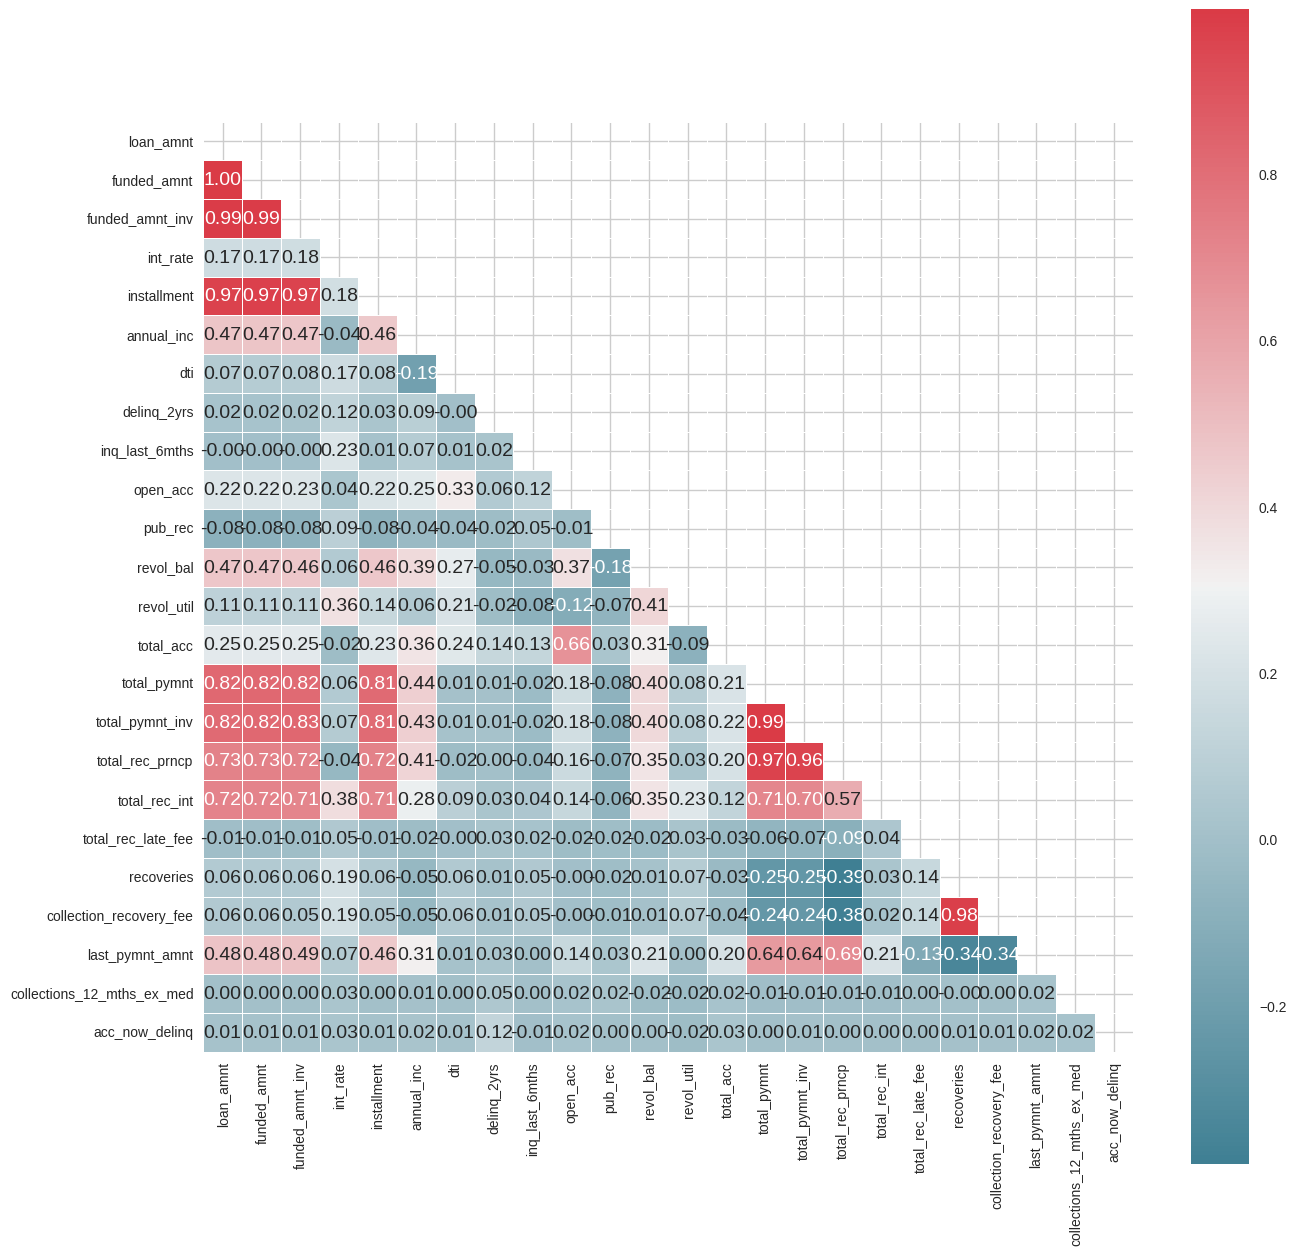

In [ ]:
correlation = output_df.corr(method='spearman') # Spearman because based on histplot visualization none of the column show the normal distribution

fig, ax = plt.subplots()
ax.figure.set_size_inches(15, 15)

mask = np.triu(np.ones_like(correlation))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correlation, cmap=cmap, square=True, mask=mask, linewidths=.5, annot_kws={'size':14},
            annot=True, fmt='.2f')
plt.show()

# Train Test Split

In [ ]:
feature = output_df.drop(['loan_status'], axis=1)
target = output_df['loan_status']

In [ ]:
transformer = ColumnTransformer([('one hot', OneHotEncoder(sparse_output=False), ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status'])], remainder = 'passthrough')

In [ ]:
feature_encode = pd.DataFrame(transformer.fit_transform(feature),columns=transformer.get_feature_names_out())
feature_encode.head()

,one hot__term_ 36 months,one hot__term_ 60 months,one hot__grade_A,one hot__grade_B,one hot__grade_C,one hot__grade_D,one hot__grade_E,one hot__grade_F,one hot__grade_G,one hot__emp_length_1 year,...,remainder__total_pymnt,remainder__total_pymnt_inv,remainder__total_rec_prncp,remainder__total_rec_int,remainder__total_rec_late_fee,remainder__recoveries,remainder__collection_recovery_fee,remainder__last_pymnt_amnt,remainder__collections_12_mths_ex_med,remainder__acc_now_delinq
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,161.03,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature_encode, target, random_state=0, stratify=y, test_size=0.3)

# Model

In [ ]:
logreg = LogisticRegression(random_state=0, solver='liblinear')
knn = KNeighborsClassifier(n_neighbors=5)
dtree = DecisionTreeClassifier(random_state=0, max_depth=5)
rf = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(random_state=0)
gbm = GradientBoostingClassifier(random_state=0)
lgbm = lgb.LGBMClassifier()
xgboost = XGBClassifier(random_state=0)


models = [
    ('Logistic Regression', logreg), 
    ('KNN', knn),
    ('Decision Tree', dtree),
    ('Random Forest', rf), 
    ('AdaBoost', ada),
    ('Gradient Boosting', gbm),
    ('Light GBM', lgbm),
    ('Xgboost', xgboost)
    ]
    
scoring_f2 = make_scorer(fbeta_score, beta=2)

In [ ]:
logreg = LogisticRegression(random_state=0, solver='liblinear')
knn = KNeighborsClassifier(n_neighbors=5)
dtree = DecisionTreeClassifier(random_state=0, max_depth=5)
rf = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(random_state=0)
gbm = GradientBoostingClassifier(random_state=0)
lgbm = lgb.LGBMClassifier()
xgboost = XGBClassifier(random_state=0)


models = [
    ('Logistic Regression', logreg), 
    ('KNN', knn),
    ('Decision Tree', dtree),
    ('Random Forest', rf), 
    ('AdaBoost', ada),
    ('Gradient Boosting', gbm),
    ('Light GBM', lgbm),
    ('Xgboost', xgboost)
    ]
    
scoring_f1 = make_scorer(fbeta_score, beta=1)

## F1

In [ ]:
def cross_val(X_train, y_train, models, metric):

    list_name = []
    list_mean = []
    list_std = []
    cross_val = []
    list_fit_time = []
    list_score_time = []

    for name, model in models:
        if models == 'knn':
          pipe_model = Pipeline([
              ('scaler', RobustScaler()),
              ('algo', model)
          ])
        else:
          pipe_model = Pipeline([
              ('algo', model)
          ])

        skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

        model_cv = cross_validate(
            estimator= pipe_model,
            X= X_train,
            y= y_train,
            cv= skfold,
            scoring= metric
        )

        if type(metric) == str:
            metric_name = metric
        else:
            metric_name = 'f1' 
        
        list_name.append(name)
        list_fit_time.append(round(model_cv['fit_time'].mean(), 3))
        list_score_time.append(round(model_cv['score_time'].mean(), 3))
        list_mean.append(round(model_cv['test_score'].mean(), 3))
        list_std.append(round(model_cv['test_score'].std(), 3))
        cross_val.append(np.round_(model_cv['test_score'],3))

    result = pd.DataFrame({
        'model' : list_name,
        f'mean {metric_name}' : list_mean,
        'std' : list_std,
        'fit time' : list_fit_time,
        'score time' : list_score_time,
        f'{metric_name}' : cross_val
    })    

    return result.sort_values(f'mean {metric_name}', ascending=False)

In [ ]:
print('Train Dataset')
cross_val(X_train, y_train, models, scoring_f1)

Train Dataset


,model,mean f1,std,fit time,score time,f1
6,Light GBM,0.999,0.0,3.509,0.158,"[0.999, 0.999, 0.999, 0.999, 0.999]"
7,Xgboost,0.999,0.0,64.055,0.102,"[0.999, 0.999, 0.999, 0.999, 0.999]"
0,Logistic Regression,0.998,0.0,4.751,0.022,"[0.998, 0.998, 0.998, 0.999, 0.999]"
3,Random Forest,0.998,0.0,36.617,0.507,"[0.998, 0.998, 0.998, 0.999, 0.999]"
5,Gradient Boosting,0.998,0.0,123.037,0.092,"[0.998, 0.997, 0.998, 0.998, 0.997]"
4,AdaBoost,0.997,0.0,25.453,0.432,"[0.997, 0.997, 0.997, 0.997, 0.997]"
1,KNN,0.991,0.0,0.057,39.187,"[0.991, 0.991, 0.992, 0.992, 0.992]"
2,Decision Tree,0.991,0.0,1.789,0.022,"[0.991, 0.991, 0.991, 0.992, 0.991]"


In [ ]:
# Test Data

list_model = []
list_f1 = []
list_roc_auc = []
list_precision = []
list_recall = []
fit_time = []
score_time = []

for name, model in models:
        if models == 'knn':
          pipe_model = Pipeline([
              ('scaler', RobustScaler()),
              ('algo', model)
          ])
        else:
          pipe_model = Pipeline([
              ('algo', model)
          ])
        
        start = time.time()
        pipe_model.fit(X_train, y_train)
        stop = time.time()
        fit_time.append(round((stop-start), 3))

        start = time.time()        
        y_pred = pipe_model.predict(X_test)
        stop = time.time()
        score_time.append(round((stop-start), 3))


        list_model.append(name)
        list_f1.append(round(fbeta_score(y_test, y_pred, beta=1), 3))
        list_roc_auc.append(round(roc_auc_score(y_test,y_pred), 3))
        list_precision.append(round(precision_score(y_test, y_pred), 3))
        list_recall.append(round(recall_score(y_test, y_pred), 3))

print('Test Dataset')
pd.DataFrame({
    'model': list_model,
    'f1 score': list_f1,
    'auc roc': list_roc_auc,
    'precision' : list_precision,
    'recall' : list_recall,
    'fit time': fit_time,
    'score time': score_time
}).sort_values('f1 score', ascending=False)  

Test Dataset


,model,f1 score,auc roc,precision,recall,fit time,score time
3,Random Forest,0.999,0.994,0.997,1.000,47.355,0.988
6,Light GBM,0.999,0.997,0.999,0.999,6.473,0.320
7,Xgboost,0.999,0.998,0.999,1.000,80.066,0.184
0,Logistic Regression,0.998,0.993,0.997,1.000,3.415,0.015
5,Gradient Boosting,0.998,0.990,0.995,1.000,155.306,0.335
4,AdaBoost,0.997,0.987,0.994,1.000,32.644,1.075
1,KNN,0.992,0.966,0.985,0.999,0.019,104.468
2,Decision Tree,0.991,0.963,0.983,1.000,2.179,0.013


## LGBM 

In [ ]:
pipe_model = Pipeline([
                ('algo', lgbm)
            ])
pipe_model.fit(X_train, y_train)
y_pred = pipe_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12727
           1       1.00      1.00      1.00     55365

    accuracy                           1.00     68092
   macro avg       1.00      1.00      1.00     68092
weighted avg       1.00      1.00      1.00     68092



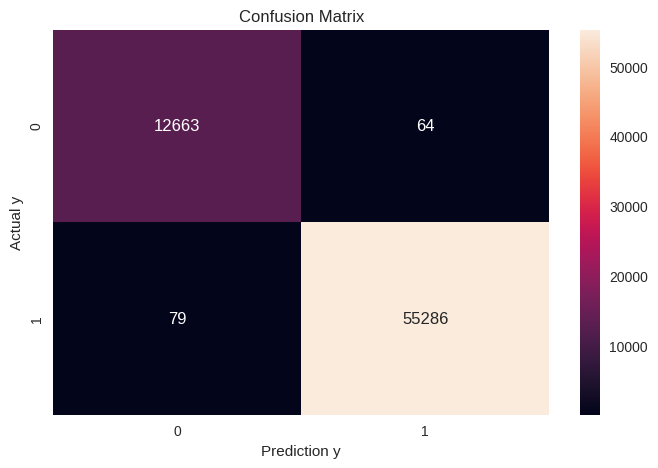

In [ ]:
plt.figure(figsize=(8,5))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='0.0f', cmap='rocket')
plt.xlabel('Prediction y')
plt.ylabel('Actual y')
plt.title('Confusion Matrix')

plt.show()

# !New Data (Cannot Afford Evaluation Metric, Predict Only)

In [ ]:
mask = ~df.index.isin(output_df.index)
new_data = df.loc[mask]
new_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
32,1065420,1299514,10000,10000,9975.0,60 months,15.96,242.97,C,C5,...,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
39,1069346,1304237,12500,12500,12475.0,60 months,12.69,282.44,B,B5,...,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
61,1068934,1277395,17500,8950,8925.0,60 months,17.27,223.74,D,D3,...,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466274,9666300,9890240,10000,10000,10000.0,36 months,11.99,332.10,B,B3,...,Feb-16,Jan-16,0.0,22.0,1,INDIVIDUAL,0.0,0.0,9557.0,17100.0
466279,9745484,11597572,15000,15000,15000.0,36 months,13.53,509.25,B,B5,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,20140.0,17600.0
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,294998.0,29900.0
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,...,Feb-16,Dec-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,73598.0,13100.0


In [ ]:
list(output_df.columns)

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'purpose',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'acc_now_delinq']

In [ ]:
df_new = new_data[list(output_df.columns)]
df_new

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq
4,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,...,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0,67.79,0.0,0.0
6,7000,7000,7000.0,60 months,15.96,170.08,C,8 years,RENT,47004.0,...,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0,170.08,0.0,0.0
32,10000,10000,9975.0,60 months,15.96,242.97,C,2 years,RENT,29120.0,...,11622.36,11593.40,7304.67,4317.69,0.0,0.0,0.0,242.97,0.0,0.0
39,12500,12500,12475.0,60 months,12.69,282.44,B,1 year,RENT,27000.0,...,13506.54,13479.58,9306.87,4199.67,0.0,0.0,0.0,282.44,0.0,0.0
61,17500,8950,8925.0,60 months,17.27,223.74,D,6 years,RENT,40000.0,...,10713.52,10683.65,6487.75,4225.77,0.0,0.0,0.0,223.74,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466274,10000,10000,10000.0,36 months,11.99,332.10,B,8 years,RENT,45000.0,...,8302.50,8302.50,6643.87,1658.63,0.0,0.0,0.0,332.10,0.0,0.0
466279,15000,15000,15000.0,36 months,13.53,509.25,B,4 years,RENT,66000.0,...,12222.00,12222.00,9314.37,2907.63,0.0,0.0,0.0,509.25,0.0,0.0
466280,18400,18400,18400.0,60 months,14.47,432.64,C,4 years,MORTGAGE,110000.0,...,10383.36,10383.36,5826.00,4557.36,0.0,0.0,0.0,432.64,0.0,0.0
466282,20700,20700,20700.0,60 months,16.99,514.34,D,7 years,MORTGAGE,46000.0,...,12343.98,12343.98,6271.69,6072.29,0.0,0.0,0.0,514.34,0.0,0.0


In [ ]:
df_new.info(verbose= True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239313 entries, 4 to 466284
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   239313 non-null  int64  
 1   funded_amnt                 239313 non-null  int64  
 2   funded_amnt_inv             239313 non-null  float64
 3   term                        239313 non-null  object 
 4   int_rate                    239313 non-null  float64
 5   installment                 239313 non-null  float64
 6   grade                       239313 non-null  object 
 7   emp_length                  226970 non-null  object 
 8   home_ownership              239313 non-null  object 
 9   annual_inc                  239309 non-null  float64
 10  verification_status         239313 non-null  object 
 11  loan_status                 239313 non-null  object 
 12  purpose                     239313 non-null  object 
 13  dti           

In [ ]:
df_new.isnull().sum()/df_new.shape[0]*100

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
emp_length                    5.157681
home_ownership                0.000000
annual_inc                    0.001671
verification_status           0.000000
loan_status                   0.000000
purpose                       0.000000
dti                           0.000000
delinq_2yrs                   0.012118
inq_last_6mths                0.012118
open_acc                      0.012118
pub_rec                       0.012118
revol_bal                     0.000000
revol_util                    0.142073
total_acc                     0.012118
initial_list_status           0.000000
total_pymnt                   0.000000
total_pymnt_inv               0.000000
total_rec_prncp               0.000000
total_rec_int            

In [ ]:
df_new.isnull().sum()

loan_amnt                     0    
funded_amnt                   0    
funded_amnt_inv               0    
term                          0    
int_rate                      0    
installment                   0    
grade                         0    
emp_length                    12343
home_ownership                0    
annual_inc                    4    
verification_status           0    
loan_status                   0    
purpose                       0    
dti                           0    
delinq_2yrs                   29   
inq_last_6mths                29   
open_acc                      29   
pub_rec                       29   
revol_bal                     0    
revol_util                    340  
total_acc                     29   
initial_list_status           0    
total_pymnt                   0    
total_pymnt_inv               0    
total_rec_prncp               0    
total_rec_int                 0    
total_rec_late_fee            0    
recoveries                  

In [ ]:
df_new["emp_length"].fillna("Other", inplace = True)

<ipython-input-393-43c6720f889f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["emp_length"].fillna("Other", inplace = True)


In [ ]:
df_new.shape

(239313, 32)

In [ ]:
df_new.isnull().sum()

loan_amnt                     0  
funded_amnt                   0  
funded_amnt_inv               0  
term                          0  
int_rate                      0  
installment                   0  
grade                         0  
emp_length                    0  
home_ownership                0  
annual_inc                    4  
verification_status           0  
loan_status                   0  
purpose                       0  
dti                           0  
delinq_2yrs                   29 
inq_last_6mths                29 
open_acc                      29 
pub_rec                       29 
revol_bal                     0  
revol_util                    340
total_acc                     29 
initial_list_status           0  
total_pymnt                   0  
total_pymnt_inv               0  
total_rec_prncp               0  
total_rec_int                 0  
total_rec_late_fee            0  
recoveries                    0  
collection_recovery_fee       0  
last_pymnt_amn

In [ ]:
df_new.dropna(inplace = True)
df_new.isnull().sum()

<ipython-input-396-c69e4dc636d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.dropna(inplace = True)


loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
acc_now_

In [ ]:
df_new.shape

(238860, 32)

In [ ]:
df_new.replace('< 1 year', 'less than 1 year', inplace=True)
df_new.replace('10+ years', 'more than 10 years', inplace=True)
X_new = df_new.drop(['loan_status'], axis=1)

<ipython-input-398-cff34b225af9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace('< 1 year', 'less than 1 year', inplace=True)
<ipython-input-398-cff34b225af9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace('10+ years', 'more than 10 years', inplace=True)


In [ ]:
categorical_cols = list(X_new.select_dtypes(['object','category']).columns)
numerical_cols = list(set(X_new.columns)-set(categorical_cols))

In [ ]:
pd.set_option('display.max_colwidth', 1)
# data unik di tiap kolom
listItem = []
for col in categorical_cols :
    listItem.append( [col, X_new[col].nunique(), X_new[col].unique()])

tabel_cat_desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel_cat_desc

,Column Name,Number of Unique,Unique Sample
0,term,2,"[ 60 months, 36 months]"
1,grade,7,"[B, C, D, F, E, G, A]"
2,emp_length,12,"[1 year, 8 years, 2 years, 6 years, 4 years, less than 1 year, 7 years, more than 10 years, 5 years, 3 years, Other, 9 years]"
3,home_ownership,5,"[RENT, OWN, MORTGAGE, OTHER, NONE]"
4,verification_status,3,"[Source Verified, Not Verified, Verified]"
5,purpose,14,"[other, debt_consolidation, small_business, credit_card, major_purchase, vacation, home_improvement, car, wedding, medical, house, moving, renewable_energy, educational]"
6,initial_list_status,2,"[f, w]"


In [ ]:
pd.set_option('display.max_colwidth', 1)
# data unik di tiap kolom
listItem = []
for col in numerical_cols :
    listItem.append( [col, X_new[col].nunique(), X_new[col].describe()])

tabel_num_desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel_num_desc

,Column Name,Number of Unique,Unique Sample
0,total_rec_prncp,135169,"count 238860.000000 mean 6506.543574 std 4584.953081 min 0.000000 25% 3267.180000 50% 5253.755000 75% 8436.650000 max 35000.000000 Name: total_rec_prncp, dtype: float64"
1,revol_util,1156,"count 238860.000000 mean 57.446872 std 22.708151 min 0.000000 25% 41.200000 50% 58.500000 75% 75.000000 max 366.600000 Name: revol_util, dtype: float64"
2,revol_bal,49672,"count 2.388600e+05 mean 1.733285e+04 std 2.276055e+04 min 0.000000e+00 25% 6.915000e+03 50% 1.255200e+04 75% 2.157925e+04 max 2.568995e+06 Name: revol_bal, dtype: float64"
3,dti,3989,"count 238860.000000 mean 18.036254 std 7.933296 min 0.000000 25% 12.070000 50% 17.680000 75% 23.730000 max 39.990000 Name: dti, dtype: float64"
4,total_acc,107,"count 238860.000000 mean 25.307599 std 11.573414 min 1.000000 25% 17.000000 50% 24.000000 75% 32.000000 max 156.000000 Name: total_acc, dtype: float64"
5,collection_recovery_fee,390,"count 238860.000000 mean 0.380046 std 28.334584 min 0.000000 25% 0.000000 50% 0.000000 75% 0.000000 max 5192.990000 Name: collection_recovery_fee, dtype: float64"
6,total_pymnt_inv,149405,"count 238860.000000 mean 9541.468388 std 6341.131964 min 0.000000 25% 4992.390000 50% 7963.490000 75% 12436.070000 max 53653.720000 Name: total_pymnt_inv, dtype: float64"
7,inq_last_6mths,28,"count 238860.000000 mean 0.743599 std 1.100208 min 0.000000 25% 0.000000 50% 0.000000 75% 1.000000 max 33.000000 Name: inq_last_6mths, dtype: float64"
8,total_pymnt,143972,"count 238860.000000 mean 9574.991919 std 6350.046536 min 0.000000 25% 5017.350000 50% 7987.290000 75% 12464.600000 max 54273.880000 Name: total_pymnt, dtype: float64"
9,collections_12_mths_ex_med,7,"count 238860.000000 mean 0.012254 std 0.128647 min 0.000000 25% 0.000000 50% 0.000000 75% 0.000000 max 20.000000 Name: collections_12_mths_ex_med, dtype: float64"


In [ ]:
feature_new = df_new.drop(['loan_status'], axis=1)

transformer = ColumnTransformer([('one hot', OneHotEncoder(sparse_output=False), ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status'])], remainder = 'passthrough')

feature_encode_new = pd.DataFrame(transformer.fit_transform(feature_new),columns=transformer.get_feature_names_out())
feature_encode_new.head()

,one hot__term_ 36 months,one hot__term_ 60 months,one hot__grade_A,one hot__grade_B,one hot__grade_C,one hot__grade_D,one hot__grade_E,one hot__grade_F,one hot__grade_G,one hot__emp_length_1 year,...,remainder__total_pymnt,remainder__total_pymnt_inv,remainder__total_rec_prncp,remainder__total_rec_int,remainder__total_rec_late_fee,remainder__recoveries,remainder__collection_recovery_fee,remainder__last_pymnt_amnt,remainder__collections_12_mths_ex_med,remainder__acc_now_delinq
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0,67.79,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0,170.08,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,11622.36,11593.40,7304.67,4317.69,0.0,0.0,0.0,242.97,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,13506.54,13479.58,9306.87,4199.67,0.0,0.0,0.0,282.44,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,10713.52,10683.65,6487.75,4225.77,0.0,0.0,0.0,223.74,0.0,0.0


In [ ]:
feature_encode

,one hot__term_ 36 months,one hot__term_ 60 months,one hot__grade_A,one hot__grade_B,one hot__grade_C,one hot__grade_D,one hot__grade_E,one hot__grade_F,one hot__grade_G,one hot__emp_length_1 year,...,remainder__total_pymnt,remainder__total_pymnt_inv,remainder__total_rec_prncp,remainder__total_rec_int,remainder__total_rec_late_fee,remainder__recoveries,remainder__collection_recovery_fee,remainder__last_pymnt_amnt,remainder__collections_12_mths_ex_med,remainder__acc_now_delinq
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.000,171.62,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.110,119.66,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.000,649.91,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.000,357.48,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.000,161.03,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226967,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2029.930000,2029.93,360.08,510.45,0.00,1159.40,11.594,217.65,0.0,0.0
226968,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5631.670000,5623.85,4580.89,1050.78,0.00,0.00,0.000,563.23,0.0,0.0
226969,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,12394.165200,12394.17,10000.00,2394.17,0.00,0.00,0.000,5501.60,0.0,0.0
226970,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.000,17.50,0.0,0.0


In [ ]:
feature_encode_new

,one hot__term_ 36 months,one hot__term_ 60 months,one hot__grade_A,one hot__grade_B,one hot__grade_C,one hot__grade_D,one hot__grade_E,one hot__grade_F,one hot__grade_G,one hot__emp_length_1 year,...,remainder__total_pymnt,remainder__total_pymnt_inv,remainder__total_rec_prncp,remainder__total_rec_int,remainder__total_rec_late_fee,remainder__recoveries,remainder__collection_recovery_fee,remainder__last_pymnt_amnt,remainder__collections_12_mths_ex_med,remainder__acc_now_delinq
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0,67.79,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0,170.08,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,11622.36,11593.40,7304.67,4317.69,0.0,0.0,0.0,242.97,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,13506.54,13479.58,9306.87,4199.67,0.0,0.0,0.0,282.44,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,10713.52,10683.65,6487.75,4225.77,0.0,0.0,0.0,223.74,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238855,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8302.50,8302.50,6643.87,1658.63,0.0,0.0,0.0,332.10,0.0,0.0
238856,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12222.00,12222.00,9314.37,2907.63,0.0,0.0,0.0,509.25,0.0,0.0
238857,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,10383.36,10383.36,5826.00,4557.36,0.0,0.0,0.0,432.64,0.0,0.0
238858,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,12343.98,12343.98,6271.69,6072.29,0.0,0.0,0.0,514.34,0.0,0.0


In [ ]:
no_cols_new = list(set(feature_encode.columns)-set(feature_encode_new.columns))
no_cols_new

['one hot__home_ownership_ANY']

In [ ]:
feature_encode_new['one hot__home_ownership_ANY'] = 0

In [ ]:
feature_encode_new

,one hot__term_ 36 months,one hot__term_ 60 months,one hot__grade_A,one hot__grade_B,one hot__grade_C,one hot__grade_D,one hot__grade_E,one hot__grade_F,one hot__grade_G,one hot__emp_length_1 year,...,remainder__total_pymnt_inv,remainder__total_rec_prncp,remainder__total_rec_int,remainder__total_rec_late_fee,remainder__recoveries,remainder__collection_recovery_fee,remainder__last_pymnt_amnt,remainder__collections_12_mths_ex_med,remainder__acc_now_delinq,one hot__home_ownership_ANY
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3242.17,2233.10,1009.07,0.0,0.0,0.0,67.79,0.0,0.0,0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,8136.84,5110.85,3025.99,0.0,0.0,0.0,170.08,0.0,0.0,0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,11593.40,7304.67,4317.69,0.0,0.0,0.0,242.97,0.0,0.0,0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,13479.58,9306.87,4199.67,0.0,0.0,0.0,282.44,0.0,0.0,0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,10683.65,6487.75,4225.77,0.0,0.0,0.0,223.74,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238855,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8302.50,6643.87,1658.63,0.0,0.0,0.0,332.10,0.0,0.0,0
238856,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12222.00,9314.37,2907.63,0.0,0.0,0.0,509.25,0.0,0.0,0
238857,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,10383.36,5826.00,4557.36,0.0,0.0,0.0,432.64,0.0,0.0,0
238858,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,12343.98,6271.69,6072.29,0.0,0.0,0.0,514.34,0.0,0.0,0


In [ ]:
X_new

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq
4,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,...,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0,67.79,0.0,0.0
6,7000,7000,7000.0,60 months,15.96,170.08,C,8 years,RENT,47004.0,...,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0,170.08,0.0,0.0
32,10000,10000,9975.0,60 months,15.96,242.97,C,2 years,RENT,29120.0,...,11622.36,11593.40,7304.67,4317.69,0.0,0.0,0.0,242.97,0.0,0.0
39,12500,12500,12475.0,60 months,12.69,282.44,B,1 year,RENT,27000.0,...,13506.54,13479.58,9306.87,4199.67,0.0,0.0,0.0,282.44,0.0,0.0
61,17500,8950,8925.0,60 months,17.27,223.74,D,6 years,RENT,40000.0,...,10713.52,10683.65,6487.75,4225.77,0.0,0.0,0.0,223.74,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466274,10000,10000,10000.0,36 months,11.99,332.10,B,8 years,RENT,45000.0,...,8302.50,8302.50,6643.87,1658.63,0.0,0.0,0.0,332.10,0.0,0.0
466279,15000,15000,15000.0,36 months,13.53,509.25,B,4 years,RENT,66000.0,...,12222.00,12222.00,9314.37,2907.63,0.0,0.0,0.0,509.25,0.0,0.0
466280,18400,18400,18400.0,60 months,14.47,432.64,C,4 years,MORTGAGE,110000.0,...,10383.36,10383.36,5826.00,4557.36,0.0,0.0,0.0,432.64,0.0,0.0
466282,20700,20700,20700.0,60 months,16.99,514.34,D,7 years,MORTGAGE,46000.0,...,12343.98,12343.98,6271.69,6072.29,0.0,0.0,0.0,514.34,0.0,0.0


In [ ]:
df_new['loan_status']

4         Current
6         Current
32        Current
39        Current
61        Current
           ...   
466274    Current
466279    Current
466280    Current
466282    Current
466284    Current
Name: loan_status, Length: 238860, dtype: object

In [ ]:
X_new['loan_status'] = df_new['loan_status']
X_new

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,loan_status
4,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,...,3242.17,2233.10,1009.07,0.0,0.0,0.0,67.79,0.0,0.0,Current
6,7000,7000,7000.0,60 months,15.96,170.08,C,8 years,RENT,47004.0,...,8136.84,5110.85,3025.99,0.0,0.0,0.0,170.08,0.0,0.0,Current
32,10000,10000,9975.0,60 months,15.96,242.97,C,2 years,RENT,29120.0,...,11593.40,7304.67,4317.69,0.0,0.0,0.0,242.97,0.0,0.0,Current
39,12500,12500,12475.0,60 months,12.69,282.44,B,1 year,RENT,27000.0,...,13479.58,9306.87,4199.67,0.0,0.0,0.0,282.44,0.0,0.0,Current
61,17500,8950,8925.0,60 months,17.27,223.74,D,6 years,RENT,40000.0,...,10683.65,6487.75,4225.77,0.0,0.0,0.0,223.74,0.0,0.0,Current
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466274,10000,10000,10000.0,36 months,11.99,332.10,B,8 years,RENT,45000.0,...,8302.50,6643.87,1658.63,0.0,0.0,0.0,332.10,0.0,0.0,Current
466279,15000,15000,15000.0,36 months,13.53,509.25,B,4 years,RENT,66000.0,...,12222.00,9314.37,2907.63,0.0,0.0,0.0,509.25,0.0,0.0,Current
466280,18400,18400,18400.0,60 months,14.47,432.64,C,4 years,MORTGAGE,110000.0,...,10383.36,5826.00,4557.36,0.0,0.0,0.0,432.64,0.0,0.0,Current
466282,20700,20700,20700.0,60 months,16.99,514.34,D,7 years,MORTGAGE,46000.0,...,12343.98,6271.69,6072.29,0.0,0.0,0.0,514.34,0.0,0.0,Current


In [ ]:
y_pred_new

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df_pred_new = pd.DataFrame(y_pred_new, columns = ['loan_status_pred'], index=X_new.index)
df_pred_new['loan_status_pred'] = np.where(df_pred_new['loan_status_pred'] == 1, 'Fully Paid' , 'Charged Off')
df_pred_new

,loan_status_pred
4,Charged Off
6,Charged Off
32,Charged Off
39,Charged Off
61,Charged Off
...,...
466274,Charged Off
466279,Charged Off
466280,Charged Off
466282,Charged Off


In [ ]:
df_new_pred = pd.concat([X_new,df_pred_new], axis = 1)
df_new_pred

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,loan_status,loan_status_pred
4,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,...,2233.10,1009.07,0.0,0.0,0.0,67.79,0.0,0.0,Current,Charged Off
6,7000,7000,7000.0,60 months,15.96,170.08,C,8 years,RENT,47004.0,...,5110.85,3025.99,0.0,0.0,0.0,170.08,0.0,0.0,Current,Charged Off
32,10000,10000,9975.0,60 months,15.96,242.97,C,2 years,RENT,29120.0,...,7304.67,4317.69,0.0,0.0,0.0,242.97,0.0,0.0,Current,Charged Off
39,12500,12500,12475.0,60 months,12.69,282.44,B,1 year,RENT,27000.0,...,9306.87,4199.67,0.0,0.0,0.0,282.44,0.0,0.0,Current,Charged Off
61,17500,8950,8925.0,60 months,17.27,223.74,D,6 years,RENT,40000.0,...,6487.75,4225.77,0.0,0.0,0.0,223.74,0.0,0.0,Current,Charged Off
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466274,10000,10000,10000.0,36 months,11.99,332.10,B,8 years,RENT,45000.0,...,6643.87,1658.63,0.0,0.0,0.0,332.10,0.0,0.0,Current,Charged Off
466279,15000,15000,15000.0,36 months,13.53,509.25,B,4 years,RENT,66000.0,...,9314.37,2907.63,0.0,0.0,0.0,509.25,0.0,0.0,Current,Charged Off
466280,18400,18400,18400.0,60 months,14.47,432.64,C,4 years,MORTGAGE,110000.0,...,5826.00,4557.36,0.0,0.0,0.0,432.64,0.0,0.0,Current,Charged Off
466282,20700,20700,20700.0,60 months,16.99,514.34,D,7 years,MORTGAGE,46000.0,...,6271.69,6072.29,0.0,0.0,0.0,514.34,0.0,0.0,Current,Charged Off


In [ ]:
df_new_pred[['loan_status']].value_counts()

loan_status                                        
Current                                                224120
Late (31-120 days)                                     6895  
In Grace Period                                        3144  
Does not meet the credit policy. Status:Fully Paid     1914  
Late (16-30 days)                                      1217  
Default                                                832   
Does not meet the credit policy. Status:Charged Off    738   
dtype: int64

In [ ]:
df_new_pred[['loan_status_pred']].value_counts()

loan_status_pred
Charged Off         234331
Fully Paid          4529  
dtype: int64

# !PyCaret

In [ ]:
!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.2/77.2 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 

In [ ]:
from pycaret.utils import version
version()

'3.0.0'

In [ ]:
import pandas as pd
from pycaret.classification import *

In [ ]:
# initial setup
setup(output_df, target='loan_status')

,Description,Value
0,Session id,7405
1,Target,loan_status
2,Target type,Binary
3,Target mapping,"Charged Off: 0, Fully Paid: 1"
4,Original data shape,"(226972, 32)"
5,Transformed data shape,"(226972, 68)"
6,Transformed train set shape,"(158880, 68)"
7,Transformed test set shape,"(68092, 68)"
8,Ordinal features,2
9,Numeric features,24


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9988,0.9996,0.9998,0.9988,0.9993,0.9961,0.9961,5.5680
dt,Decision Tree Classifier,0.9981,0.9965,0.9990,0.9986,0.9988,0.9936,0.9936,5.1390
lr,Logistic Regression,0.9980,0.9994,0.9996,0.9979,0.9988,0.9935,0.9935,32.3210
rf,Random Forest Classifier,0.9977,0.9999,0.9999,0.9973,0.9986,0.9924,0.9925,37.1470
svm,SVM - Linear Kernel,0.9971,0.0000,0.9994,0.9970,0.9982,0.9903,0.9904,2.5780
et,Extra Trees Classifier,0.9962,0.9998,1.0000,0.9954,0.9977,0.9875,0.9876,30.8020
gbc,Gradient Boosting Classifier,0.9959,0.9996,0.9999,0.9951,0.9975,0.9865,0.9866,91.2610
ada,Ada Boost Classifier,0.9947,0.9993,0.9996,0.9939,0.9968,0.9824,0.9825,18.8680
knn,K Neighbors Classifier,0.9863,0.9855,0.9992,0.9842,0.9917,0.9539,0.9547,46.5630
qda,Quadratic Discriminant Analysis,0.9813,0.9757,0.9968,0.9805,0.9886,0.9366,0.9376,3.1430


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

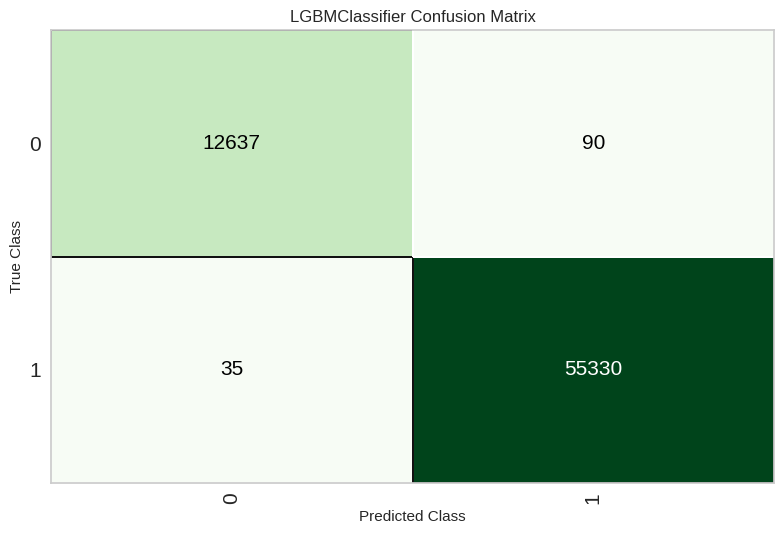

In [ ]:
# plot confusion matrix
plot_model(best_model, plot = 'confusion_matrix')

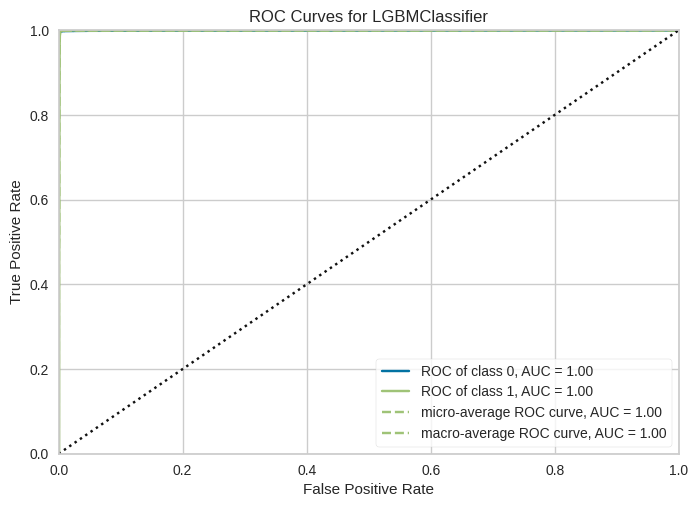

In [ ]:
# plot AUC
plot_model(best_model, plot = 'auc')

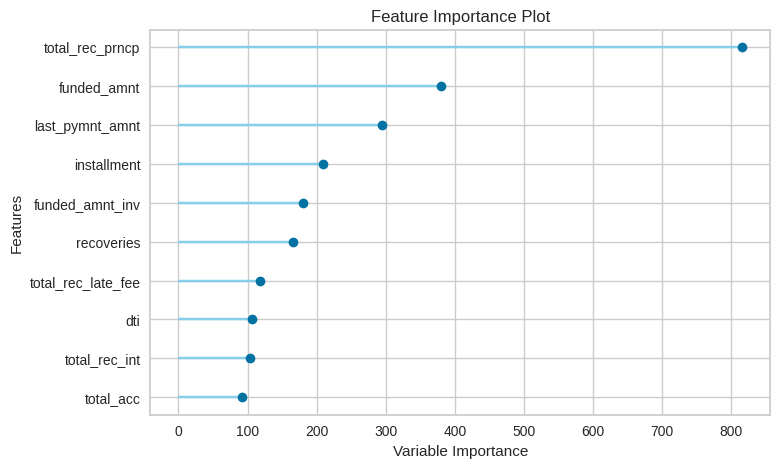

In [ ]:
# plot feature importance
plot_model(best_model, plot = 'feature')

In [ ]:
# predict on test set using lgbm classifier
holdout_pred = predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9982,0.9989,0,0,0,0.9940,0.9940


In [ ]:
# show predictions df
holdout_pred.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,loan_status,prediction_label,prediction_score
17826,35000,35000,34266.230469,36 months,7.29,1085.349976,A,10+ years,MORTGAGE,300000.0,...,4071.219971,0.0,0.0,0.0,1094.849976,0.0,0.0,Fully Paid,Fully Paid,0.9987
161608,12000,12000,12000.000000,36 months,11.14,393.670013,B,10+ years,RENT,80000.0,...,2149.189941,0.0,0.0,0.0,1945.420044,0.0,0.0,Fully Paid,Fully Paid,0.9997
288518,28750,28750,28750.000000,36 months,12.49,961.659973,B,5 years,MORTGAGE,102000.0,...,279.290009,0.0,0.0,0.0,29049.240234,0.0,0.0,Fully Paid,Fully Paid,1.0000
165754,20000,20000,20000.000000,36 months,6.03,608.719971,A,< 1 year,MORTGAGE,110000.0,...,1169.630005,0.0,0.0,0.0,13257.950195,0.0,0.0,Fully Paid,Fully Paid,1.0000
346274,19500,19500,19500.000000,60 months,15.61,470.179993,D,Other,OWN,43344.0,...,2849.760010,0.0,0.0,0.0,470.179993,0.0,0.0,Charged Off,Charged Off,0.9999


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

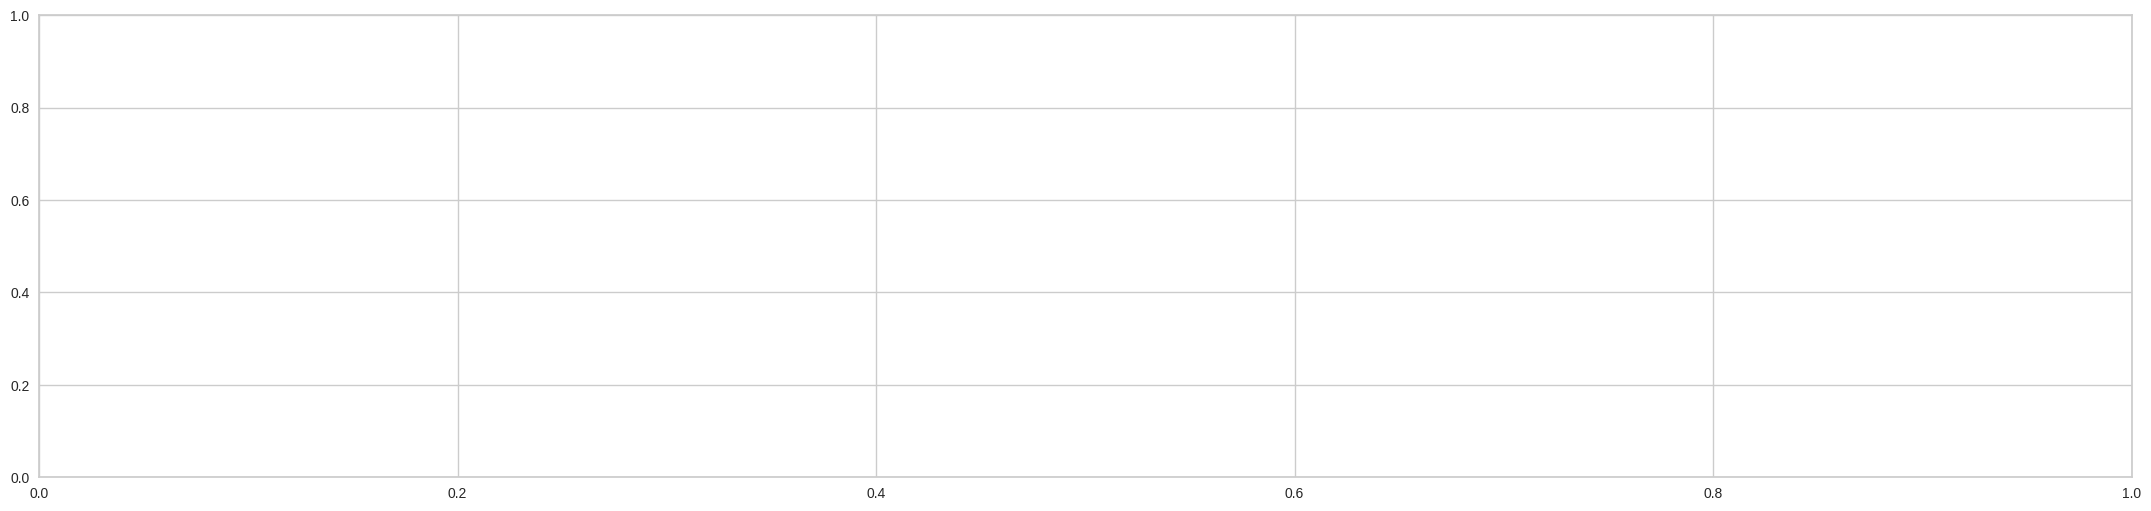

In [ ]:
# evaluate trained model
evaluate_model(best_model)

In [ ]:
# predict on test set
pred_test = predict_model(best_model) 

In [ ]:
# predict on new data
new_data = data.copy().drop('Column name', axis)

# !EDA before menentukan loan_status as Target

In [ ]:
pd.set_option('display.max_colwidth', 1)
# data unik di tiap kolom
listItem = []
for col in wo_id.columns :
    listItem.append( [col, wo_id[col].nunique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique
0,loan_amnt,1352
1,funded_amnt,1354
2,funded_amnt_inv,9854
3,term,2
4,int_rate,506
5,installment,55622
6,grade,7
7,sub_grade,35
8,emp_title,205475
9,emp_length,11


In [ ]:
wo_id[['term']].value_counts()

term      
 36 months    337953
 60 months    128332
dtype: int64

In [ ]:
wo_id[['verification_status']].value_counts()

verification_status
Verified               168055
Source Verified        149993
Not Verified           148237
dtype: int64

In [ ]:
wo_id[['acc_now_delinq']].value_counts()

acc_now_delinq
0.0               464524
1.0               1623  
2.0               92    
3.0               11    
4.0               4     
5.0               2     
dtype: int64

In [ ]:
wo_id[['term']].value_counts()

In [ ]:
wo_id[['grade']].value_counts()

grade
B        136929
C        125293
D        76888 
A        74867 
E        35757 
F        13229 
G        3322  
dtype: int64

In [ ]:
wo_id[['loan_status']].value_counts()

loan_status                                        
Current                                                224226
Fully Paid                                             184739
Charged Off                                            42475 
Late (31-120 days)                                     6900  
In Grace Period                                        3146  
Does not meet the credit policy. Status:Fully Paid     1988  
Late (16-30 days)                                      1218  
Default                                                832   
Does not meet the credit policy. Status:Charged Off    761   
dtype: int64

In [ ]:
wo_id[['pymnt_plan']].value_counts()

pymnt_plan
n             466276
y             9     
dtype: int64

In [ ]:
wo_id[['initial_list_status']].value_counts()

initial_list_status
f                      303005
w                      163280
dtype: int64

In [ ]:
display(df.describe(), df.describe(include='object'))

In [ ]:
correlation = df.corr(method='pearson') 

fig, ax = plt.subplots()
ax.figure.set_size_inches(15, 15)

mask = np.triu(np.ones_like(correlation))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correlation, cmap=cmap, square=True, mask=mask, linewidths=.5, annot_kws={'size':14},
            annot=True, fmt='.2f')
plt.show()

<ipython-input-33-432dd9d4238b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
id,1.000000,0.997299,0.067542,0.071149,0.080057,-0.030501,0.039863,0.024231,0.130291,0.072024,...,-0.066162,-0.030594,-0.078282,0.056528,0.027466,NaN,0.026759,0.004007,0.007574,0.023957
member_id,0.997299,1.000000,0.070210,0.073942,0.083196,-0.028278,0.042639,0.024921,0.129867,0.072536,...,-0.066358,-0.030748,-0.076851,0.056772,0.027791,NaN,0.026981,0.004088,0.007827,0.023818
loan_amnt,0.067542,0.070210,1.000000,0.998548,0.994347,0.167183,0.949666,0.370893,0.057319,0.006841,...,0.110691,0.077336,0.304243,-0.008067,-0.066374,NaN,0.006283,-0.002859,0.332686,0.290208
funded_amnt,0.071149,0.073942,0.998548,1.000000,0.996125,0.167921,0.951787,0.370311,0.058673,0.007386,...,0.110338,0.077190,0.304178,-0.007822,-0.066359,NaN,0.006472,-0.002859,0.332683,0.290206
funded_amnt_inv,0.080057,0.083196,0.994347,0.996125,1.000000,0.169353,0.947387,0.367806,0.062606,0.008143,...,0.107944,0.073781,0.303105,-0.007175,-0.066301,NaN,0.006801,-0.002858,0.332677,0.290185
int_rate,-0.030501,-0.028278,0.167183,0.167921,0.169353,1.000000,0.148790,-0.046072,0.159657,0.079190,...,0.127893,0.082198,0.075609,0.020306,-0.006686,NaN,0.030338,0.000863,-0.097316,-0.146838
installment,0.039863,0.042639,0.949666,0.951787,0.947387,0.148790,1.000000,0.368145,0.049919,0.017001,...,0.105666,0.075344,0.299867,-0.006055,-0.066462,NaN,0.008923,-0.002359,0.300639,0.270074
annual_inc,0.024231,0.024921,0.370893,0.370311,0.367806,-0.046072,0.368145,1.000000,-0.188548,0.058896,...,0.016954,0.013680,0.142155,-0.000445,-0.068390,NaN,0.017133,0.001895,0.486086,0.291955
dti,0.130291,0.129867,0.057319,0.058673,0.062606,0.159657,0.049919,-0.188548,1.000000,-0.003694,...,0.021462,0.018084,-0.043068,0.000308,0.029121,NaN,0.009491,-0.003560,-0.018384,0.060972
delinq_2yrs,0.072024,0.072536,0.006841,0.007386,0.008143,0.079190,0.017001,0.058896,-0.003694,1.000000,...,0.004484,0.005382,-0.013740,0.039147,-0.437091,NaN,0.126532,0.000072,0.072699,-0.035028


In [ ]:
# Generate histogram for each columns (exc. CUST_ID)
fig, axes = plt.subplots(6, 3, figsize=(24,24))

for i, j in zip(df.select_dtypes('number').columns, axes.flatten()):
    sns.histplot(data=df, x= i, ax= j)
plt.gca().axis('off')
plt.show()